In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, AveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
import time
from tensorflow.keras.preprocessing import image
from sklearn.metrics import f1_score, accuracy_score
import os

In [2]:
#define directory path
train_dir = 'C:/Users/ASUS/OneDrive/Dokumen/Informatika Semester 6/Proyek Profesional/CODING/data_jamur/train'
test_dir = 'C:/Users/ASUS/OneDrive/Dokumen/Informatika Semester 6/Proyek Profesional/CODING/data_jamur/test'

In [3]:
data_dir = pathlib.Path("C:/Users/ASUS/OneDrive/Dokumen/Informatika Semester 6/Proyek Profesional/CODING/data_jamur/train") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['Agaricus' 'Amanita' 'Boletus' 'Cortinarius' 'random_images']


In [4]:
agaricus_dir = os.path.join(train_dir, 'Agaricus/')
amanita_dir = os.path.join(train_dir, 'Amanita/')
boletus_dir = os.path.join(train_dir, 'Boletus/')
cortinarius_dir = os.path.join(train_dir, 'Cortinarius/')
random_dir = os.path.join(train_dir, 'random_images/')

print("Jumlah Data Train Tiap Kelas")
print("Jumlah Gambar Jamur Genus Agaricus (dapat dimakan) : ", len(os.listdir(agaricus_dir)))
print("Jumlah Gambar Jamur Genus Amanita (tidak bisa dimakan) : ", len(os.listdir(amanita_dir)))
print("Jumlah Gambar Jamur Genus Boletus (dapat dimakan) : ", len(os.listdir(boletus_dir)))
print("Jumlah Gambar Jamur Genus Cortinarius (tidak bisa dimakan) : ", len(os.listdir(cortinarius_dir)))

Jumlah Data Train Tiap Kelas
Jumlah Gambar Jamur Genus Agaricus (dapat dimakan) :  361
Jumlah Gambar Jamur Genus Amanita (tidak bisa dimakan) :  373
Jumlah Gambar Jamur Genus Boletus (dapat dimakan) :  386
Jumlah Gambar Jamur Genus Cortinarius (tidak bisa dimakan) :  364


In [5]:
agaricus_dir = os.path.join(test_dir, 'Agaricus/')
amanita_dir = os.path.join(test_dir, 'Amanita/')
boletus_dir = os.path.join(test_dir, 'Boletus/')
cortinarius_dir = os.path.join(test_dir, 'Cortinarius/')
random_dir = os.path.join(test_dir, 'random_images/')

print("Jumlah Data Train Tiap Kelas")
print("Jumlah Gambar Jamur Genus Agaricus (dapat dimakan) : ", len(os.listdir(agaricus_dir)))
print("Jumlah Gambar Jamur Genus Amanita (tidak bisa dimakan) : ", len(os.listdir(amanita_dir)))
print("Jumlah Gambar Jamur Genus Boletus (dapat dimakan) : ", len(os.listdir(boletus_dir)))
print("Jumlah Gambar Jamur Genus Cortinarius (tidak bisa dimakan) : ", len(os.listdir(cortinarius_dir)))

Jumlah Data Train Tiap Kelas
Jumlah Gambar Jamur Genus Agaricus (dapat dimakan) :  214
Jumlah Gambar Jamur Genus Amanita (tidak bisa dimakan) :  209
Jumlah Gambar Jamur Genus Boletus (dapat dimakan) :  215
Jumlah Gambar Jamur Genus Cortinarius (tidak bisa dimakan) :  215


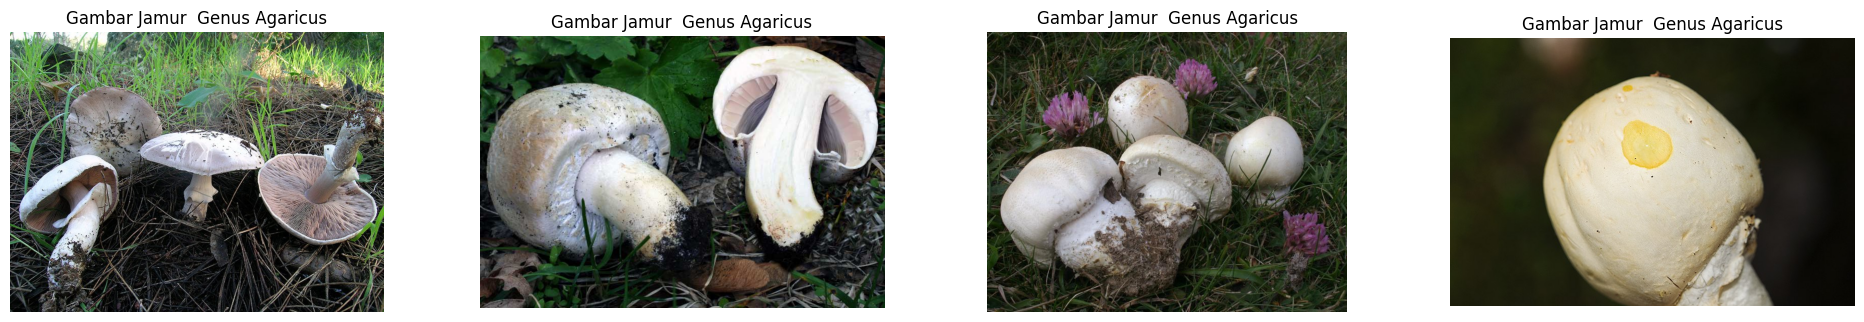

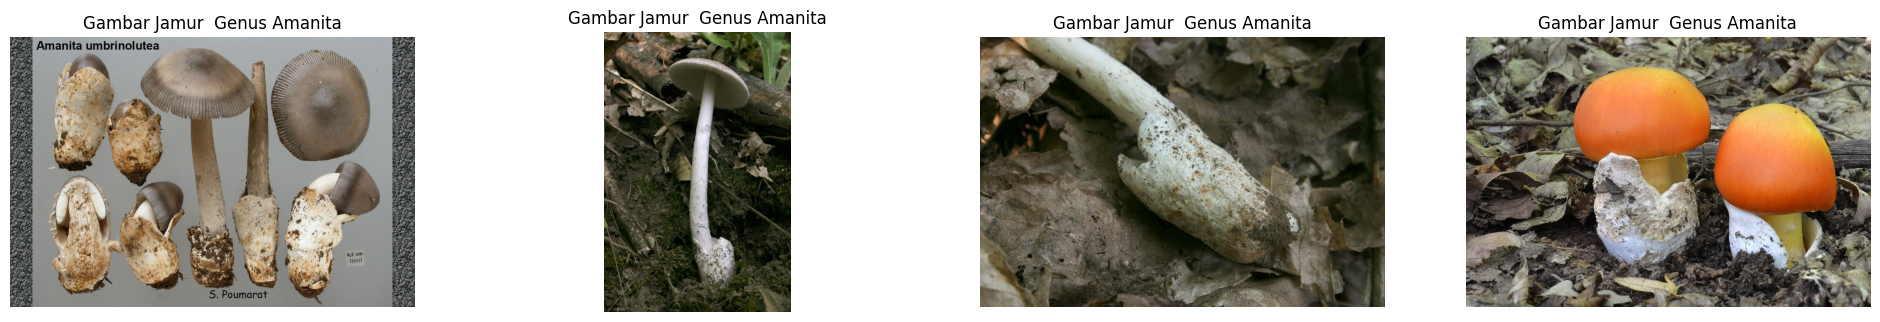

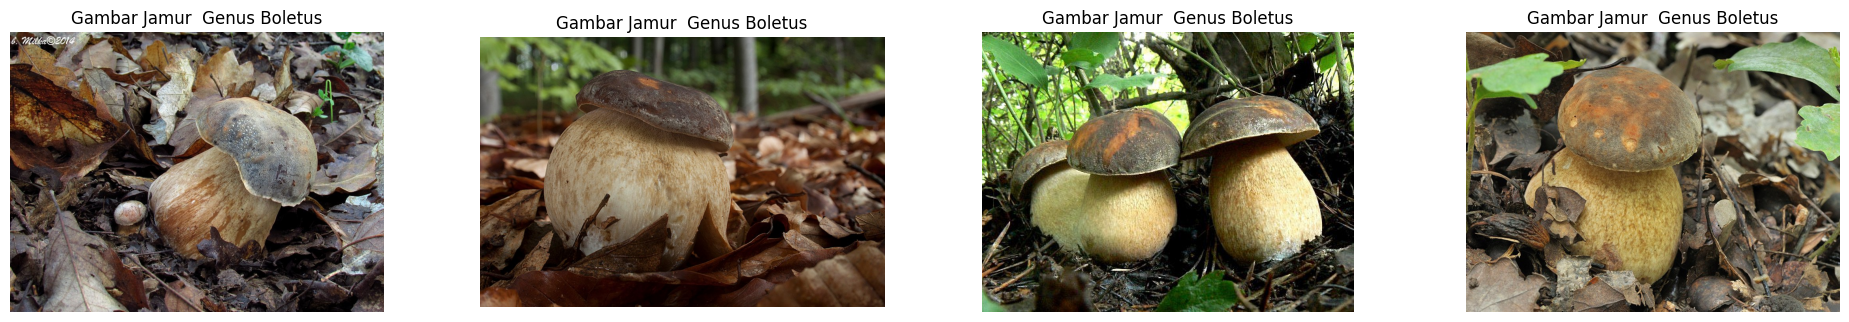

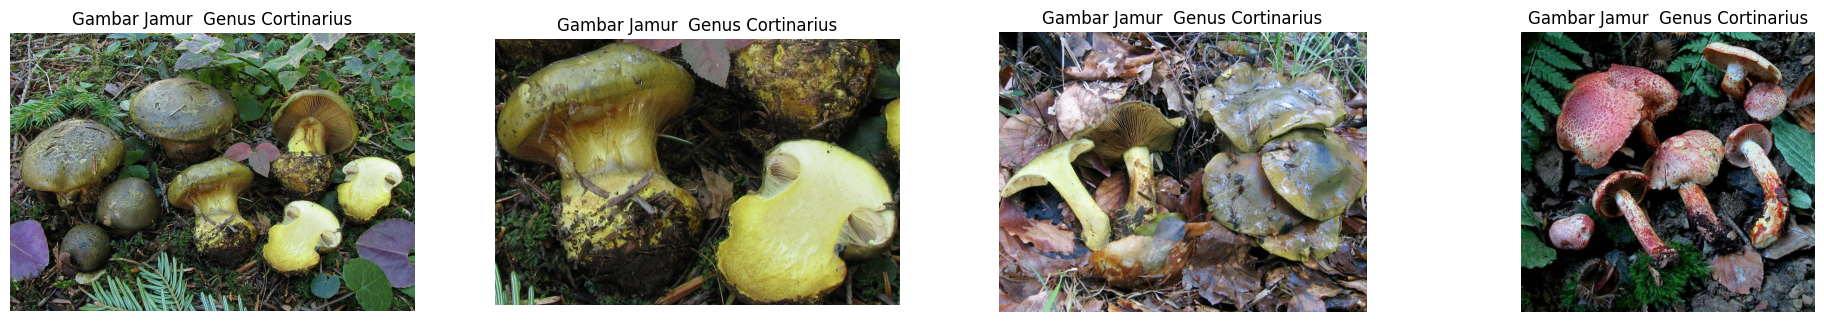

In [6]:
file_train_agaricus=os.path.join("C:/Users/ASUS/OneDrive/Dokumen/Informatika Semester 6/Proyek Profesional/CODING/data_jamur/train/Agaricus")
file_train_amanita=os.path.join("C:/Users/ASUS/OneDrive/Dokumen/Informatika Semester 6/Proyek Profesional/CODING/data_jamur/train/Amanita")
file_train_boletus=os.path.join("C:/Users/ASUS/OneDrive/Dokumen/Informatika Semester 6/Proyek Profesional/CODING/data_jamur/train/Boletus")
file_train_cortinarius=os.path.join("C:/Users/ASUS/OneDrive/Dokumen/Informatika Semester 6/Proyek Profesional/CODING/data_jamur/train/Cortinarius")
# file_train_random=os.path.join("/content/gdrive/My Drive/data_jamur2/train/random_images/")

agaricus_image = os.listdir(file_train_agaricus)
amanita_image = os.listdir(file_train_amanita)
boletus_image = os.listdir(file_train_boletus)
cortinarius_image = os.listdir(file_train_cortinarius)
# random_image = os.listdir(file_train_random)

fname1 = [os.path.join(file_train_agaricus,fname)
        for fname in agaricus_image[:4]]

fname2 = [os.path.join(file_train_amanita,fname)
        for fname in amanita_image[:4]]

fname3 = [os.path.join(file_train_boletus,fname)
        for fname in boletus_image[:4]]

fname4 = [os.path.join(file_train_cortinarius,fname)
        for fname in cortinarius_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*6,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Gambar Jamur  Genus Agaricus')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*6,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Gambar Jamur  Genus Amanita')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*6,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Gambar Jamur  Genus Boletus')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*6,nrow*4)
for i,fname in enumerate(fname4):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Gambar Jamur  Genus Cortinarius')
    plt.imshow(img)
    
plt.show()

In [7]:
train_datagen = ImageDataGenerator(
                    rescale=1./255, 
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range  = 0.2)

test_datagen = ImageDataGenerator(
                    rescale=1./255, 
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=64,
        seed=42,
        class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), 
        batch_size=64,
        seed=42, 
        class_mode='categorical',
)

Found 1649 images belonging to 5 classes.
Found 971 images belonging to 5 classes.


In [9]:
train_generator.class_indices

{'Agaricus': 0,
 'Amanita': 1,
 'Boletus': 2,
 'Cortinarius': 3,
 'random_images': 4}

In [10]:
val_generator.class_indices

{'Agaricus': 0,
 'Amanita': 1,
 'Boletus': 2,
 'Cortinarius': 3,
 'random_images': 4}

In [11]:
start_time = time.time()

In [12]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [13]:
model.compile(loss="categorical_crossentropy",
              optimizer='Adam',
              metrics=["accuracy"])

trained_model = model.fit(train_generator, epochs = 50, steps_per_epoch = 20, validation_data = val_generator)

Epoch 1/50
20/20 [==============================] - 57s 2s/step - loss: 1.6014 - accuracy: 0.2133 - val_loss: 1.5825 - val_accuracy: 0.2152
Epoch 2/50
20/20 [==============================] - 24s 1s/step - loss: 1.5177 - accuracy: 0.3172 - val_loss: 1.4391 - val_accuracy: 0.3079
Epoch 3/50
20/20 [==============================] - 28s 1s/step - loss: 1.3532 - accuracy: 0.3905 - val_loss: 1.2819 - val_accuracy: 0.4212
Epoch 4/50
20/20 [==============================] - 22s 1s/step - loss: 1.2163 - accuracy: 0.4891 - val_loss: 1.1753 - val_accuracy: 0.5324
Epoch 5/50
20/20 [==============================] - 23s 1s/step - loss: 1.1685 - accuracy: 0.4977 - val_loss: 1.1482 - val_accuracy: 0.5283
Epoch 6/50
20/20 [==============================] - 22s 1s/step - loss: 1.1068 - accuracy: 0.5431 - val_loss: 1.1127 - val_accuracy: 0.5118
Epoch 7/50
20/20 [==============================] - 22s 1s/step - loss: 1.0641 - accuracy: 0.5549 - val_loss: 1.0947 - val_accuracy: 0.5448
Epoch 8/50
20/20 [==

In [14]:
tf.keras.models.save_model(model, 'my_model.hdf5')

In [15]:
print("Waktu yang digunakan untuk pelatihan model : %s menit" % ((time.time() - start_time)//60))

Waktu yang digunakan untuk pelatihan model : 18.0 menit


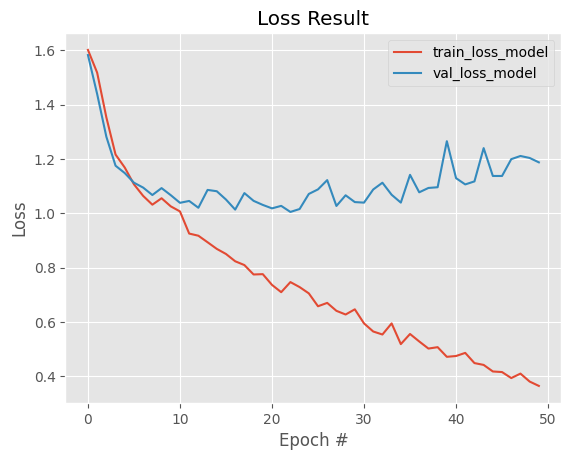

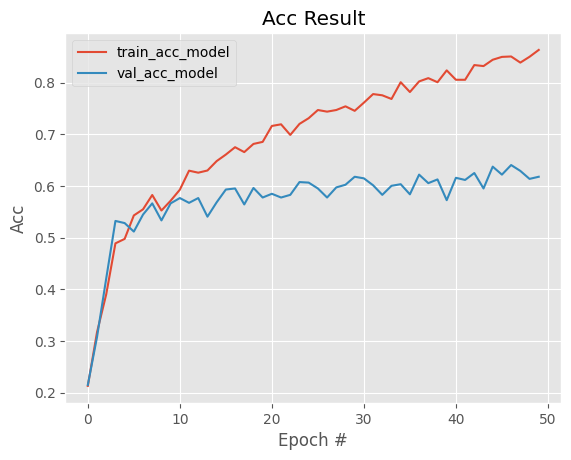

In [16]:
%matplotlib inline

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), trained_model.history["loss"], label="train_loss_model")
plt.plot(np.arange(0, 50), trained_model.history["val_loss"], label="val_loss_model")
plt.title("Loss Result")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), trained_model.history["accuracy"], label="train_acc_model")
plt.plot(np.arange(0, 50), trained_model.history["val_accuracy"], label="val_acc_model")
plt.title("Acc Result")
plt.xlabel("Epoch #"),
plt.ylabel("Acc")
plt.legend()
plt.show()

In [17]:
np.save('history.npy', trained_model.history)

In [18]:
model.evaluate(train_generator)

26/26 [==============================] - 15s 568ms/step - loss: 0.3157 - accuracy: 0.8793


[0.31567609310150146, 0.8793208003044128]

In [19]:
model.evaluate(val_generator)

16/16 [==============================] - 9s 547ms/step - loss: 1.2236 - accuracy: 0.6138


[1.2236188650131226, 0.6138002276420593]

In [20]:
# membuat prediksi pada data validasi
val_steps = len(val_generator)
y_val_pred = np.zeros((val_generator.n, 5))
y_val = np.zeros((val_generator.n, 5))
for i in range(val_steps):
    X_val, y_val[i*val_generator.batch_size : (i+1)*val_generator.batch_size] = val_generator[i]
    y_val_pred[i*val_generator.batch_size : (i+1)*val_generator.batch_size] = model.predict(X_val)

# memastikan bahwa hasil prediksi dalam bentuk 0/1
y_val_pred = (y_val_pred > 0.5).astype(int)

# menghitung f1_score
f1 = f1_score(y_val, y_val_pred, average='macro')

print("F1-Score: ", f1)

1/1 [==============================] - 0s 83ms/step
F1-Score:  0.6334466231585457
